In [2]:
import wandb
api = wandb.Api()
import dataclasses
import utils
from transformers import AutoConfig

model_families = {
    'gpt2': [('gpt2', 'cb7j1cv8'), ('gpt2-large', 'qjhxfznk'), ('gpt2-xl', 'bail0tuk')],
    'llama': [('meta-llama/Llama-2-7b-hf', 'vcmgan78')],
    'pythia': [('EleutherAI/pythia-410m', 'dmkd4rbs'), ('EleutherAI/pythia-1.4b', 'rbf6xqn3'), ('EleutherAI/pythia-160m', '')],
}

to_plot = 'gpt2'

@dataclasses.dataclass
class Plot:
    title: str
    plt_scatter_kwargs: list[dict] = dataclasses.field(default_factory=lambda: [{}])

plot = Plot(to_plot)
for model, run_id in model_families[to_plot]:
    run = api.run(f"ananthag/Head Word New Sweeps/{run_id}")
    df = run.history()
    utils.get_model()
    num_layers = utils.get_num_layers(AutoConfig.from_pretrained(model))
    values = []
    for layer in range(num_layers):
        values.append(df[f"layer_{layer}/val/acc"].dropna().max())
    plot.plt_scatter_kwargs.append(dict(
        x=range(num_layers),
        y=values,
        label=model,
    ))

AttributeError: 'str' object has no attribute 'num_hidden_layers'

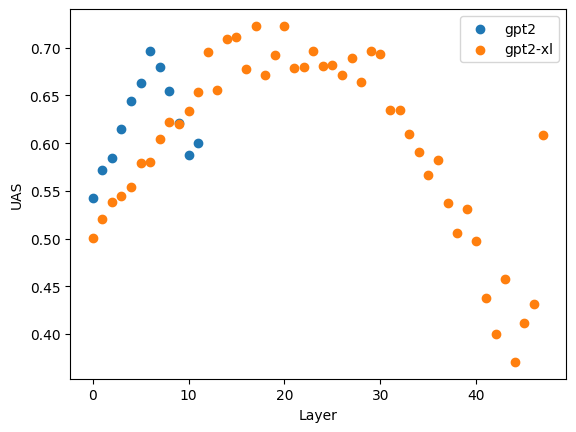

In [43]:
# import matplotlib.pyplot as plt

# plt.scatter(range(12), to_plot, label='gpt2')
# plt.scatter(range(48), to_plot_xl, label='gpt2-xl')
# plt.xlabel('Layer')
# plt.ylabel('UAS')
# # plt.title('GPT-2')
# plt.legend()
# plt.show()



In [ ]:
run = api.run("ananthag/Head Word New Sweeps/bail0tuk")
to_plot_xl = []
df = run.history()
for layer in range(48):
    to_plot_xl.append(df[f"layer_{layer}/val/acc"].dropna().max())